In [1]:
import os
import numpy as np
import pickle as pkl
import random
import string
from nltk import ngrams

#Load data
#Tokenization
#Change method: load data as list of lower case words, remove symbols including '<br />'

def folder_file(path, label):
    filelist = os.listdir(path)
    review = []
    target = []
    for i in filelist:
        file = os.path.join(path,i)
        f = open(file).read()
        f_rev = f.replace('<br />', ' ')
        lines = f_rev.split(' ')
        symbols = '!?${}()[].,:;+-*/&|<>=~" '
        words = map(lambda Element: Element.translate(str.maketrans("","",symbols)).strip().lower(), lines)
        words = list(filter(None, words))
        review.append(words)
        target.append(label)
    return review, target

train_pos_path = "aclImdb/train/pos"
train_neg_path = "aclImdb/train/neg"
test_pos_path = "aclImdb/test/pos"
test_neg_path = "aclImdb/test/neg"

review_train_pos, target_train_pos = folder_file(train_pos_path, 1)
review_train_neg, target_train_neg = folder_file(train_neg_path, 0)
review_test_pos, target_test_pos = folder_file(test_pos_path, 1)
review_test_neg, target_test_neg = folder_file(test_neg_path, 0)

In [2]:
# Split train data into actual train and validation sets, make a list to store all training tokens

train_split = 10000

train_data_pos = review_train_pos[:train_split]
train_targets_pos = target_train_pos[:train_split]

train_data_neg = review_train_neg[:train_split]
train_targets_neg = target_train_neg[:train_split]

val_data_pos = review_train_pos[train_split:]
val_targets_pos = target_train_pos[train_split:]

val_data_neg = review_train_neg[train_split:]
val_targets_neg = target_train_neg[train_split:]

#Define train, val, test datasets

train_data_tokens_ori = train_data_pos + train_data_neg
train_target = train_targets_pos + train_targets_neg

val_data_tokens_ori = val_data_pos + val_data_neg
val_target = val_targets_pos + val_targets_neg

test_data_tokens_ori = review_test_neg + review_test_pos
test_target = target_test_neg + target_test_pos

print ("Train dataset size is {}".format(len(train_data_tokens_ori)))
print ("Val dataset size is {}".format(len(val_data_tokens_ori)))
print ("Test dataset size is {}".format(len(test_data_tokens_ori)))


Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [3]:
# Add n gram to train data tokens

# Define ngrams
def find_ngrams(input_list, n):
    return zip(*[input_list[i:] for i in range(n)])

# Add ngram to tokens
def add_ngram(tokens_ori, n):
    tokens = []
    for i in range(len(tokens_ori)):
        n_grams = find_ngrams(tokens_ori[i], n)
        a = tokens_ori[i] + list(n_grams)
        tokens.append(a)
    return tokens


In [4]:
import timeit

start = timeit.default_timer()

train_data_tokens_1 = add_ngram(train_data_tokens_ori, 2)
val_data_tokens_1 = add_ngram(val_data_tokens_ori, 2)
test_data_tokens_1 = add_ngram(test_data_tokens_ori, 2)

train_data_tokens = add_ngram(train_data_tokens_1, 3)
val_data_tokens = add_ngram(val_data_tokens_1, 3)
test_data_tokens = add_ngram(test_data_tokens_1, 3)
    
stop = timeit.default_timer() 
print (stop - start)


# from train_data_tokens, join elements in all lists
import itertools
all_train_tokens = list(itertools.chain.from_iterable(train_data_tokens))

10.64187484201102


In [5]:
train_data_tokens[5:7]

[['i',
  'saw',
  'the',
  'movie',
  'with',
  'two',
  'grown',
  'children',
  'although',
  'it',
  'was',
  'not',
  'as',
  'clever',
  'as',
  'shrek',
  'i',
  'thought',
  'it',
  'was',
  'rather',
  'good',
  'in',
  'a',
  'movie',
  'theatre',
  'surrounded',
  'by',
  'children',
  'who',
  'were',
  'on',
  'spring',
  'break',
  'there',
  'was',
  'not',
  'a',
  'sound',
  'so',
  'i',
  'know',
  'the',
  'children',
  'all',
  'liked',
  'it',
  'there',
  'parents',
  'also',
  'seemed',
  'engaged',
  'the',
  'death',
  'and',
  'apparent',
  'death',
  'of',
  'characters',
  'brought',
  'about',
  'the',
  'appropriate',
  'gasps',
  'and',
  'comments',
  'hopefully',
  'people',
  'realize',
  'this',
  'movie',
  'was',
  'made',
  'for',
  'kids',
  'as',
  'such',
  'it',
  'was',
  'successful',
  'although',
  'i',
  'liked',
  'it',
  'too',
  'personally',
  'i',
  'liked',
  'the',
  'scrat',
  ('i', 'saw'),
  ('saw', 'the'),
  ('the', 'movie'),
  ('

In [6]:
# tokenization function 

# import spacy
# import string
# import pickle as pkl
# import random

# # Load English tokenizer, tagger, parser, NER and word vectors
# tokenizer = spacy.load('en_core_web_sm')
# punctuations = string.punctuation

# # lowercase and remove punctuation, returns a list of tokens
# def tokenize(sent):
#   tokens = tokenizer(sent)
#   return [token.text.lower() for token in tokens if (token.text not in punctuations)]

# def tokenize_dataset(dataset):
#     token_dataset = []
#     # we are keeping track of all tokens in dataset 
#     # in order to create vocabulary later
#     all_tokens = []
    
#     for sample in dataset:
#         tokens = tokenize(sample)
#         token_dataset.append(tokens)
#         all_tokens += tokens

#     return token_dataset, all_tokens

In [7]:
# #val set tokens
# print ("Tokenizing val data")
# val_data_tokens, _ = tokenize_dataset(val_data)
# pkl.dump(val_data_tokens, open("val_data_tokens.p", "wb"))

# #test set tokens
# print ("Tokenizing test data")
# test_data_tokens, _ = tokenize_dataset(test_data)
# pkl.dump(test_data_tokens, open("test_data_tokens.p", "wb"))

# #train set tokens
# print ("Tokenizing train data")
# train_data_tokens, all_train_tokens = tokenize_dataset(train_data)
# pkl.dump(train_data_tokens, open("train_data_tokens.p", "wb"))
# pkl.dump(all_train_tokens, open("all_train_tokens.p", "wb"))

In [8]:
# Load pickle files
# import pickle as pkl

# train_data_tokens = pkl.load(open("train_data_tokens.p", "rb"))
# all_train_tokens = pkl.load(open("all_train_tokens.p", "rb"))

# val_data_tokens = pkl.load(open("val_data_tokens.p", "rb"))
# test_data_tokens = pkl.load(open("test_data_tokens.p", "rb"))

In [9]:
train_data_tokens[5:6]

[['i',
  'saw',
  'the',
  'movie',
  'with',
  'two',
  'grown',
  'children',
  'although',
  'it',
  'was',
  'not',
  'as',
  'clever',
  'as',
  'shrek',
  'i',
  'thought',
  'it',
  'was',
  'rather',
  'good',
  'in',
  'a',
  'movie',
  'theatre',
  'surrounded',
  'by',
  'children',
  'who',
  'were',
  'on',
  'spring',
  'break',
  'there',
  'was',
  'not',
  'a',
  'sound',
  'so',
  'i',
  'know',
  'the',
  'children',
  'all',
  'liked',
  'it',
  'there',
  'parents',
  'also',
  'seemed',
  'engaged',
  'the',
  'death',
  'and',
  'apparent',
  'death',
  'of',
  'characters',
  'brought',
  'about',
  'the',
  'appropriate',
  'gasps',
  'and',
  'comments',
  'hopefully',
  'people',
  'realize',
  'this',
  'movie',
  'was',
  'made',
  'for',
  'kids',
  'as',
  'such',
  'it',
  'was',
  'successful',
  'although',
  'i',
  'liked',
  'it',
  'too',
  'personally',
  'i',
  'liked',
  'the',
  'scrat',
  ('i', 'saw'),
  ('saw', 'the'),
  ('the', 'movie'),
  ('

In [10]:
# Max vacabulary size is 20000
from collections import Counter

max_vocab_size = 20000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens)

In [11]:
dict(list(token2id.items())[0:150])

{'the': 2,
 'a': 3,
 'and': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'in': 8,
 'it': 9,
 'this': 10,
 'i': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 ('of', 'the'): 19,
 'film': 20,
 'on': 21,
 'not': 22,
 'you': 23,
 'are': 24,
 'his': 25,
 'have': 26,
 'he': 27,
 'be': 28,
 'one': 29,
 ('in', 'the'): 30,
 'at': 31,
 'all': 32,
 'by': 33,
 'an': 34,
 'they': 35,
 'from': 36,
 'who': 37,
 'so': 38,
 'like': 39,
 'her': 40,
 'just': 41,
 'or': 42,
 'about': 43,
 "it's": 44,
 'has': 45,
 'out': 46,
 'if': 47,
 'some': 48,
 'there': 49,
 ('this', 'movie'): 50,
 'what': 51,
 'good': 52,
 'when': 53,
 'more': 54,
 'very': 55,
 ('and', 'the'): 56,
 ('is', 'a'): 57,
 'even': 58,
 'my': 59,
 ('the', 'film'): 60,
 'she': 61,
 'up': 62,
 'no': 63,
 'time': 64,
 ('to', 'the'): 65,
 'only': 66,
 'would': 67,
 'which': 68,
 ('to', 'be'): 69,
 'really': 70,
 'story': 71,
 'their': 72,
 ('the', 'movie'): 73,
 'see': 74,
 'had': 75,
 'can': 76,
 'were': 77,
 (

In [12]:
# Lets check the dictionary by loading random token from it

random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

Token id 13232 ; token ('i', 'gave', 'this')
Token ('i', 'gave', 'this'); token id 13232


In [13]:
# convert token to id in the dataset
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_data_indices = token2index_dataset(train_data_tokens)
val_data_indices = token2index_dataset(val_data_tokens)
test_data_indices = token2index_dataset(test_data_tokens)

# double checking
print ("Train dataset size is {}".format(len(train_data_indices)))
print ("Val dataset size is {}".format(len(val_data_indices)))
print ("Test dataset size is {}".format(len(test_data_indices)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [14]:
MAX_SENTENCE_LENGTH = 400

import numpy as np
import torch
from torch.utils.data import Dataset

class NewsGroupDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of newsgroup tokens 
        @param target_list: list of newsgroup targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def newsgroup_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

# create pytorch dataloader
#train_loader = NewsGroupDataset(train_data_indices, train_target)
#val_loader = NewsGroupDataset(val_data_indices, val_target)
#test_loader = NewsGroupDataset(test_data_indices, test_target)

BATCH_SIZE = 32
train_dataset = NewsGroupDataset(train_data_indices, train_target)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices, val_target)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices, test_target)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

#for i, (data, lengths, labels) in enumerate(train_loader):
#    print (data)
#    print (labels)
#    break

In [15]:
# First import torch related libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfWords, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,20)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out

emb_dim = 200
model = BagOfWords(len(id2token), emb_dim)

In [27]:
learning_rate = 0.02
num_epochs = 10 # number epoch to train

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  


# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

train_accuracy = []
val_accuracy = []
epoch_list = []
for epoch in range(num_epochs):
    
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        lr_i = learning_rate/(epoch+1)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr_i)
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))
    
    train_acc = test_model(train_loader, model)
    val_acc = test_model(val_loader, model)
    train_accuracy.append(train_acc)
    val_accuracy.append(val_acc)
    epoch_list.append(epoch+1)

Epoch: [1/10], Step: [101/625], Validation Acc: 88.22
Epoch: [1/10], Step: [201/625], Validation Acc: 86.18
Epoch: [1/10], Step: [301/625], Validation Acc: 88.36
Epoch: [1/10], Step: [401/625], Validation Acc: 86.62
Epoch: [1/10], Step: [501/625], Validation Acc: 89.08
Epoch: [1/10], Step: [601/625], Validation Acc: 86.72
Epoch: [2/10], Step: [101/625], Validation Acc: 88.5
Epoch: [2/10], Step: [201/625], Validation Acc: 88.34
Epoch: [2/10], Step: [301/625], Validation Acc: 87.96
Epoch: [2/10], Step: [401/625], Validation Acc: 88.76
Epoch: [2/10], Step: [501/625], Validation Acc: 87.9
Epoch: [2/10], Step: [601/625], Validation Acc: 88.0
Epoch: [3/10], Step: [101/625], Validation Acc: 88.14
Epoch: [3/10], Step: [201/625], Validation Acc: 88.42
Epoch: [3/10], Step: [301/625], Validation Acc: 88.82
Epoch: [3/10], Step: [401/625], Validation Acc: 88.5
Epoch: [3/10], Step: [501/625], Validation Acc: 87.92
Epoch: [3/10], Step: [601/625], Validation Acc: 88.52
Epoch: [4/10], Step: [101/625], 

In [17]:
print ("After training for {} epochs".format(num_epochs))
print ("Val Acc {}".format(test_model(val_loader, model)))
print ("Test Acc {}".format(test_model(test_loader, model)))

After training for 10 epochs
Val Acc 88.5
Test Acc 88.516


In [28]:
import pandas as pd
best_model_accuracy = pd.DataFrame(
    {'epoch': epoch_list,
     'train_accuracy': train_accuracy,
     'val_accuracy': val_accuracy
    })
best_model_accuracy.set_index('epoch', inplace = True)

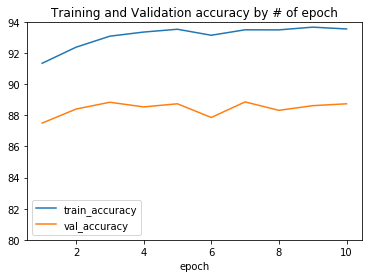

In [34]:
import matplotlib.pyplot as plt
best_model_accuracy.plot()
plt.title('Training and Validation accuracy by # of epoch')
plt.ylim(ymin=80) 
plt.show()

In [263]:
data_batch, length_batch, label_batch = next(iter(val_loader))
outputs = F.softmax(model(data_batch, length_batch), dim=1)
predicted = outputs.max(1, keepdim=True)[1]
correct = predicted.eq(label_batch.view_as(predicted))

In [264]:
correct

tensor([[1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=torch.uint8)

In [265]:
true_cases = [21,22,23]
false_cases = [2,5,14]
true_print = {}
false_print = {}

for i in true_cases:
    used_w = []
    for m in data_batch[i]:
        used_w.append(id2token[m])
        recover = ''.join(str(used_w).replace("'", "")).replace(",", "")
        true_print[i] = recover

for i in false_cases:
    used_w = []
    for m in data_batch[i]:
        used_w.append(id2token[m])
        recover = ''.join(str(used_w).replace("'", "")).replace(",", "")
        false_print[i] = recover

        
pd.set_option('display.max_colwidth', 0)
correct_tbl = pd.DataFrame(pd.Series(true_print, name = 'text that were predicted correctly'))
correct_tbl.index.name = 'Case #'
correct_tbl.reset_index

incorrect_tbl = pd.DataFrame(pd.Series(false_print, name = 'text that were predicted incorrectly'))
incorrect_tbl.index.name = 'Case #'
incorrect_tbl.reset_index

<bound method DataFrame.reset_index of                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [266]:
correct_tbl

text that were predicted correctly
Case #                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
21      [the sequel to the ever popular cinderella story reminded me somewhat of what they did with one of the beauty the beast movies "its" basically three short stories rolled into 1 ok the <unk> are adorable i love <unk> "hes" <unk> cute and <unk> awesome as usual i liked some of the newer characters as well <unk> <unk> was adorable and i did like <unk> still the storyline was somewhat limited but still very cute so i vote 710 (the sequel) (sequel to) (to the) <unk> <unk> <unk> <unk> <unk> (reminded me) <unk> <unk> (of what) (what they) (they did) (did with) (with one) (one of) (of the) (the beauty) <unk> (the beast) <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> (i love) <unk> <unk> <unk> <unk> (cute and) <unk> <unk> <unk> (as usual) <unk> (i liked) <unk> (some of) (of the) <unk> <unk> (characters as) (as well) <unk> <unk> <unk> <unk> <unk> (and i) (i did) (did like) <unk> <unk> (still the) (the storyline) <unk> <unk> <unk> <unk> (but still) (still very) <unk> <unk> (so i) <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> (with one of) (one of the) <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> 

In [267]:
incorrect_tbl

,text that were predicted incorrectly
Case #,
2,"[the biggest one that bugs the hell out of me is that they say <unk> takes dutch <unk> but she is speaking german to him the 2 <unk> are completely different its like saying well he takes french <unk> and start talking spanish james belushi gives more the feeling of being a comedy actor not a detective in the slightest the role just ""doesnt"" fit him even if its <unk> to be a comedy to many <unk> stuff typical comment or <unk> if you ""dont"" look at those things i think it could be a nice movie to watch if its ever on tv but i ""wouldnt"" <unk> renting it (the biggest) <unk> (one that) <unk> <unk> (the hell) (hell out) (out of) (of me) (me is) (is that) (that they) (they say) <unk> <unk> <unk> <unk> <unk> (but she) (she is) <unk> <unk> <unk> (to him) (him the) (the 2) <unk> <unk> (are completely) (completely different) <unk> <unk> <unk> <unk> (well he) (he takes) <unk> <unk> <unk> (and start) <unk> <unk> <unk> <unk> <unk> <unk> (more the) (the feeling) (feeling of) (of being) (being a) (a comedy) <unk> <unk> (not a) <unk> <unk> (in the) (the slightest) <unk> (the role) <unk> (just ""doesnt"") <unk> <unk> <unk> (even if) <unk> <unk> <unk> (to be) (be a) (a comedy) <unk> (to many) <unk> <unk> <unk> <unk> <unk> <unk> <unk> (if you) (you ""dont"") <unk> (look at) <unk> <unk> (things i) (i think) (think it) (it could) (could be) (be a) (a nice) <unk> (movie to) (to watch) (watch if) <unk> <unk> <unk> (on tv) <unk> (but i) (i ""wouldnt"") <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> (the hell out) <unk> <unk> <unk> <unk> (is that they) <unk> <unk> <unk> <unk> <unk> <unk> <unk> (but she is) <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> (the feeling of) <unk> (of being a) <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> (to be a) <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> (if you ""dont"") <unk> <unk> <unk> <unk> <unk> <unk> (i think it) <unk> (it could be) (could be a) <unk> <unk> <unk> (movie to watch) <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>]"
5,"[this movie set out to be better than the average action movie and in that regard they <unk> movie had spectacular cinematography featuring spectacular mountain snow and <unk> very fit <unk> putting in a good performance as <unk> exciting <unk> a great performance from ""its"" main villain <unk> he will really shock you with his evil <unk> movie does not rank an all time great <unk> of the weak screen <unk> plot and story <unk> for this movie to make <unk> an extra special <unk> like the rambo or rocky or bond movie <unk> chose to <unk> <unk> character in this one which is ok but considering the <unk> <unk> the excitement <unk> dialogue was cheesy and <unk> <unk> at <unk> script should have been more realistic and less <unk> weak point was the unrealistic shooting <unk> movie makers should have been more <unk> how they <unk> the shooting hits and <unk> should have continued the quality of the scenes of the shooting sequences during the plane <unk> early in the <unk> decided to water down a lot of the shooting sequences <unk> <unk> tv series as soon as the villains set foot on the mountain <unk> movie had a lot of all time great <unk> action <unk> dialogue and more <unk> style <unk> from <unk> would have taken this movie to a higher <unk> know this was not <unk> <unk> sen